In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
macro_data = pd.read_csv('./data/macro.csv')
train = pd.read_csv('./data/train.csv')

In [3]:
macro_data.shape

(2484, 100)

In [65]:
def describe_nans(df):
    to_drop = []
    nansfraclist = []
    textdatacols = []
    suspicious = []
    for col in df.columns:
        nans = df[col].isnull().sum()    
        nansfrac = nans/df.shape[0]
        unique = df[col].value_counts()
        if nansfrac > 0.4 or len(unique) < 3:
            to_drop.append(col)
        #print( '-'*10)
        #print('Column {} statistics:'.format(col))
        #print( '-'*10)
        #print('Nan\'s count: {0} | Fraction: {1:.5f}'.format(nans,nansfrac))
        #print('Num unique : {0}'.format(len(unique)))
        nansfraclist.append((nansfrac,col))
        if not nans:
            flag = False
            for i in range(3):
                if i in unique.index:
                    flag = True
            if flag:
                suspicious.append(col)
            try:
                df[col].astype(int)
            except:
                print('Text data in {}'.format(col))
                textdatacols.append(col)
    nansfraclist = sorted(nansfraclist, key = lambda x: x[0], reverse = True)
    df = df[[i[1] for i in nansfraclist]]
    return df,nansfraclist,textdatacols, suspicious

In [66]:
macro_data, nancount, textdatacols, suspicious = describe_nans(macro_data)

Text data in timestamp


In [18]:
nancount

[(0.7061191626409018, 'provision_retail_space_modern_sqm'),
 (0.70571658615136879, 'provision_retail_space_sqm'),
 (0.5591787439613527, 'modern_education_share'),
 (0.5591787439613527, 'old_education_build_share'),
 (0.41183574879227053, 'grp_growth'),
 (0.41183574879227053, 'load_of_teachers_preschool_per_teacher'),
 (0.41183574879227053, 'hospital_beds_available_per_cap'),
 (0.41183574879227053, 'hospital_bed_occupancy_per_year'),
 (0.41183574879227053, 'theaters_viewers_per_1000_cap'),
 (0.41183574879227053, 'museum_visitis_per_100_cap'),
 (0.41183574879227053, 'population_reg_sports_share'),
 (0.41183574879227053, 'students_reg_sports_share'),
 (0.26489533011272143, 'grp'),
 (0.26489533011272143, 'real_dispos_income_per_cap_growth'),
 (0.26489533011272143, 'salary_growth'),
 (0.26489533011272143, 'profitable_enterpr_share'),
 (0.26489533011272143, 'unprofitable_enterpr_share'),
 (0.26489533011272143, 'share_own_revenues'),
 (0.26489533011272143, 'overdue_wages_per_cap'),
 (0.264895

In [5]:
to_drop

['grp_growth',
 'water_pipes_share',
 'baths_share',
 'heating_share',
 'old_house_share',
 'load_of_teachers_preschool_per_teacher',
 'modern_education_share',
 'old_education_build_share',
 'hospital_beds_available_per_cap',
 'hospital_bed_occupancy_per_year',
 'provision_retail_space_sqm',
 'provision_retail_space_modern_sqm',
 'theaters_viewers_per_1000_cap',
 'museum_visitis_per_100_cap',
 'population_reg_sports_share',
 'students_reg_sports_share']

In [68]:
train, nancount, textdatacols, suspicious = describe_nans(train)

Text data in timestamp
Text data in product_type
Text data in sub_area
Text data in culture_objects_top_25
Text data in thermal_power_plant_raion
Text data in incineration_raion
Text data in oil_chemistry_raion
Text data in radiation_raion
Text data in railroad_terminal_raion
Text data in big_market_raion
Text data in nuclear_reactor_raion
Text data in detention_facility_raion
Text data in water_1line
Text data in big_road1_1line
Text data in railroad_1line
Text data in ecology


Encode all data in list above

In [20]:
nancount

[(0.47392602802664829, 'hospital_beds_raion'),
 (0.44649010534606676, 'build_year'),
 (0.44498047323684814, 'state'),
 (0.43585704440287487, 'cafe_sum_500_min_price_avg'),
 (0.43585704440287487, 'cafe_sum_500_max_price_avg'),
 (0.43585704440287487, 'cafe_avg_price_500'),
 (0.31413475107479244, 'max_floor'),
 (0.31413475107479244, 'material'),
 (0.31413475107479244, 'num_room'),
 (0.31413475107479244, 'kitch_sq'),
 (0.2194873814446523, 'preschool_quota'),
 (0.21938892717665978, 'school_quota'),
 (0.21410521479439468, 'cafe_sum_1000_min_price_avg'),
 (0.21410521479439468, 'cafe_sum_1000_max_price_avg'),
 (0.21410521479439468, 'cafe_avg_price_1000'),
 (0.20947786419874634, 'life_sq'),
 (0.16379508385021824, 'raion_build_count_with_material_info'),
 (0.16379508385021824, 'build_count_block'),
 (0.16379508385021824, 'build_count_wood'),
 (0.16379508385021824, 'build_count_frame'),
 (0.16379508385021824, 'build_count_brick'),
 (0.16379508385021824, 'build_count_monolith'),
 (0.16379508385021

Проблемы с NAN в:
- build year - исправить или дамми
- state - дохерища нанов, ставить дамми.
- cafe_sum_500_min_price_avg, cafe_sum_500_max_price_avg, cafe_avg_price_500 - 43.5% нанов, скорее всего выкинуть
- max_floor - исправить NAN, есть нули (550). Проверить одно-двух этажные дома по цене квартиры.
- material - поставим дамми, все хорошо
- num_room - исправить NAN, есть нули (14). Сделать отдельную дамми под такие квартиры.
- kitch_sq - исправить NAN, есть нули и херня вроде 2013. 
- **по четырем фичам сверху (max_floor, material, num_room, kitch_sq) - одинаковое число NAN в каждой фиче, надо проверить**
- preschool_quota, school_quota - исправить NAN, попробовав восстановить по району
- cafe_sum_1000_min_price_avg, cafe_sum_1000_max_price_avg, cafe_avg_price_1000 - 21.4% нанов, скорее всего выкинуть
- life_sq - исправить NAN, есть нули и единицы. Возможно стоит выкинуть. ОЧЕНЬ слабая корреляция с полной площадью квартиры и это странно
- raion_build_count_with_material_info - число зданий в том же районе, что и наблюдение, по которым известен материал дома. Хз что делать с NAN (избытыточная фича, равна сумме по build_count_x)
- build_count_x - тоже непонятно, что делать с NAN. 
- raion_build_count_with_builddate_info - аналогично с выше.(избытыточная фича, равна сумме по build_count_x)
- build_count_x-y - аналогично с выше.
- **данные по build\_count\_ (год или материал) отсутствуют либо во всей строчке, либо есть все**
- cafe_sum_1500_min_price_avg, cafe_sum_1500_max_price_avg, cafe_avg_price_1500 - 13.7% нанов
- **все переменные вида cafe_sum - надо пробовать восстановить по району**
- prom_part_5000 - возможно стоит выкинуть, потому что есть 500-1000 и т.д. метровые зоны.  5км далековато. С другой стороны можно восстановить средним, плохо скорее всего не будет. 
- floor - 167 нанов, аномальные значения (77 этаж, на деле скорее всего 7). Восстанавливать медианой плохая идея. Можно попробовать посмотреть ценовую категорию этих нанов и восстановить средней этажностью из той же ценовой категории
- metro_min_walk, metro_km_walk, railroad_station_walk_km, railroad_station_walk_min, ID_railroad_station_walk - во-первых линейная зависимость, во-вторых - одинаковое число нанов по этим переменным. Надо смотреть внимательнее на эту группу зданий.

Ебанутые цифры в:
- full_sq - удалить, все что меньше санитарных норм (сейчас это 28 кв м на однокомнатную хату). Но думаю стоит тереть все, что меньше 25 - дальше сильный вспелеск в виде 80-100 квартир, что неслучайно скорее всего
- все расстояния - есть ровно нули, при этом же есть расстояния вида 0.15. Надо смотреть

Гипотеза о хуете в четверке max_floor, material, num_room, kitch_sq:

In [103]:
train[train['max_floor'].isnull()][['max_floor', 'material', 'num_room', 'kitch_sq']].isnull().sum()

max_floor    9572
material     9572
num_room     9572
kitch_sq     9572
dtype: int64

In [104]:
bad_idx = train[train['max_floor'].isnull()].index

Гипотеза о хуете подтвердилась. Также NAN в этих квартирах:
- state
- build_year
- 

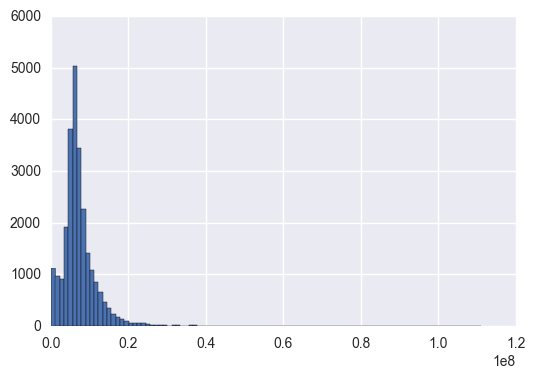

In [136]:
train.loc[~train['build_count_frame'].isnull(),:]['price_doc'].hist(bins = 100)

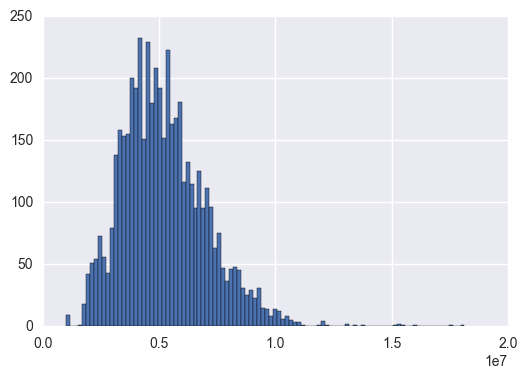

In [137]:
train.loc[train['build_count_frame'].isnull(),:]['price_doc'].hist(bins = 100)

In [132]:
train.loc[:, 'build_year'].value_counts(dropna = False)

NaN            13605
 2014.0          919
 2015.0          824
 0.0             530
 2013.0          464
 1970.0          418
 1969.0          407
 1968.0          389
 1967.0          384
 1965.0          378
 2016.0          375
 1.0             368
 1972.0          360
 1974.0          357
 1971.0          352
 1966.0          348
 1960.0          344
 1962.0          338
 1973.0          333
 1963.0          325
 1964.0          315
 1975.0          309
 1961.0          297
 1976.0          263
 1977.0          260
 2006.0          242
 1979.0          236
 1978.0          235
 2008.0          234
 2012.0          233
               ...  
 1912.0            5
 1947.0            4
 1924.0            3
 1914.0            3
 1949.0            3
 3.0               2
 1946.0            2
 1896.0            2
 1860.0            2
 1941.0            2
 1943.0            2
 1900.0            2
 1907.0            2
 1904.0            1
 1920.0            1
 1691.0            1
 1906.0      

In [100]:
train['state'].value_counts(dropna = False)

NaN      13559
 2.0      5844
 3.0      5790
 1.0      4855
 4.0       422
 33.0        1
Name: state, dtype: int64

In [6]:
macro_data = macro_data.drop(to_drop, axis = 1)

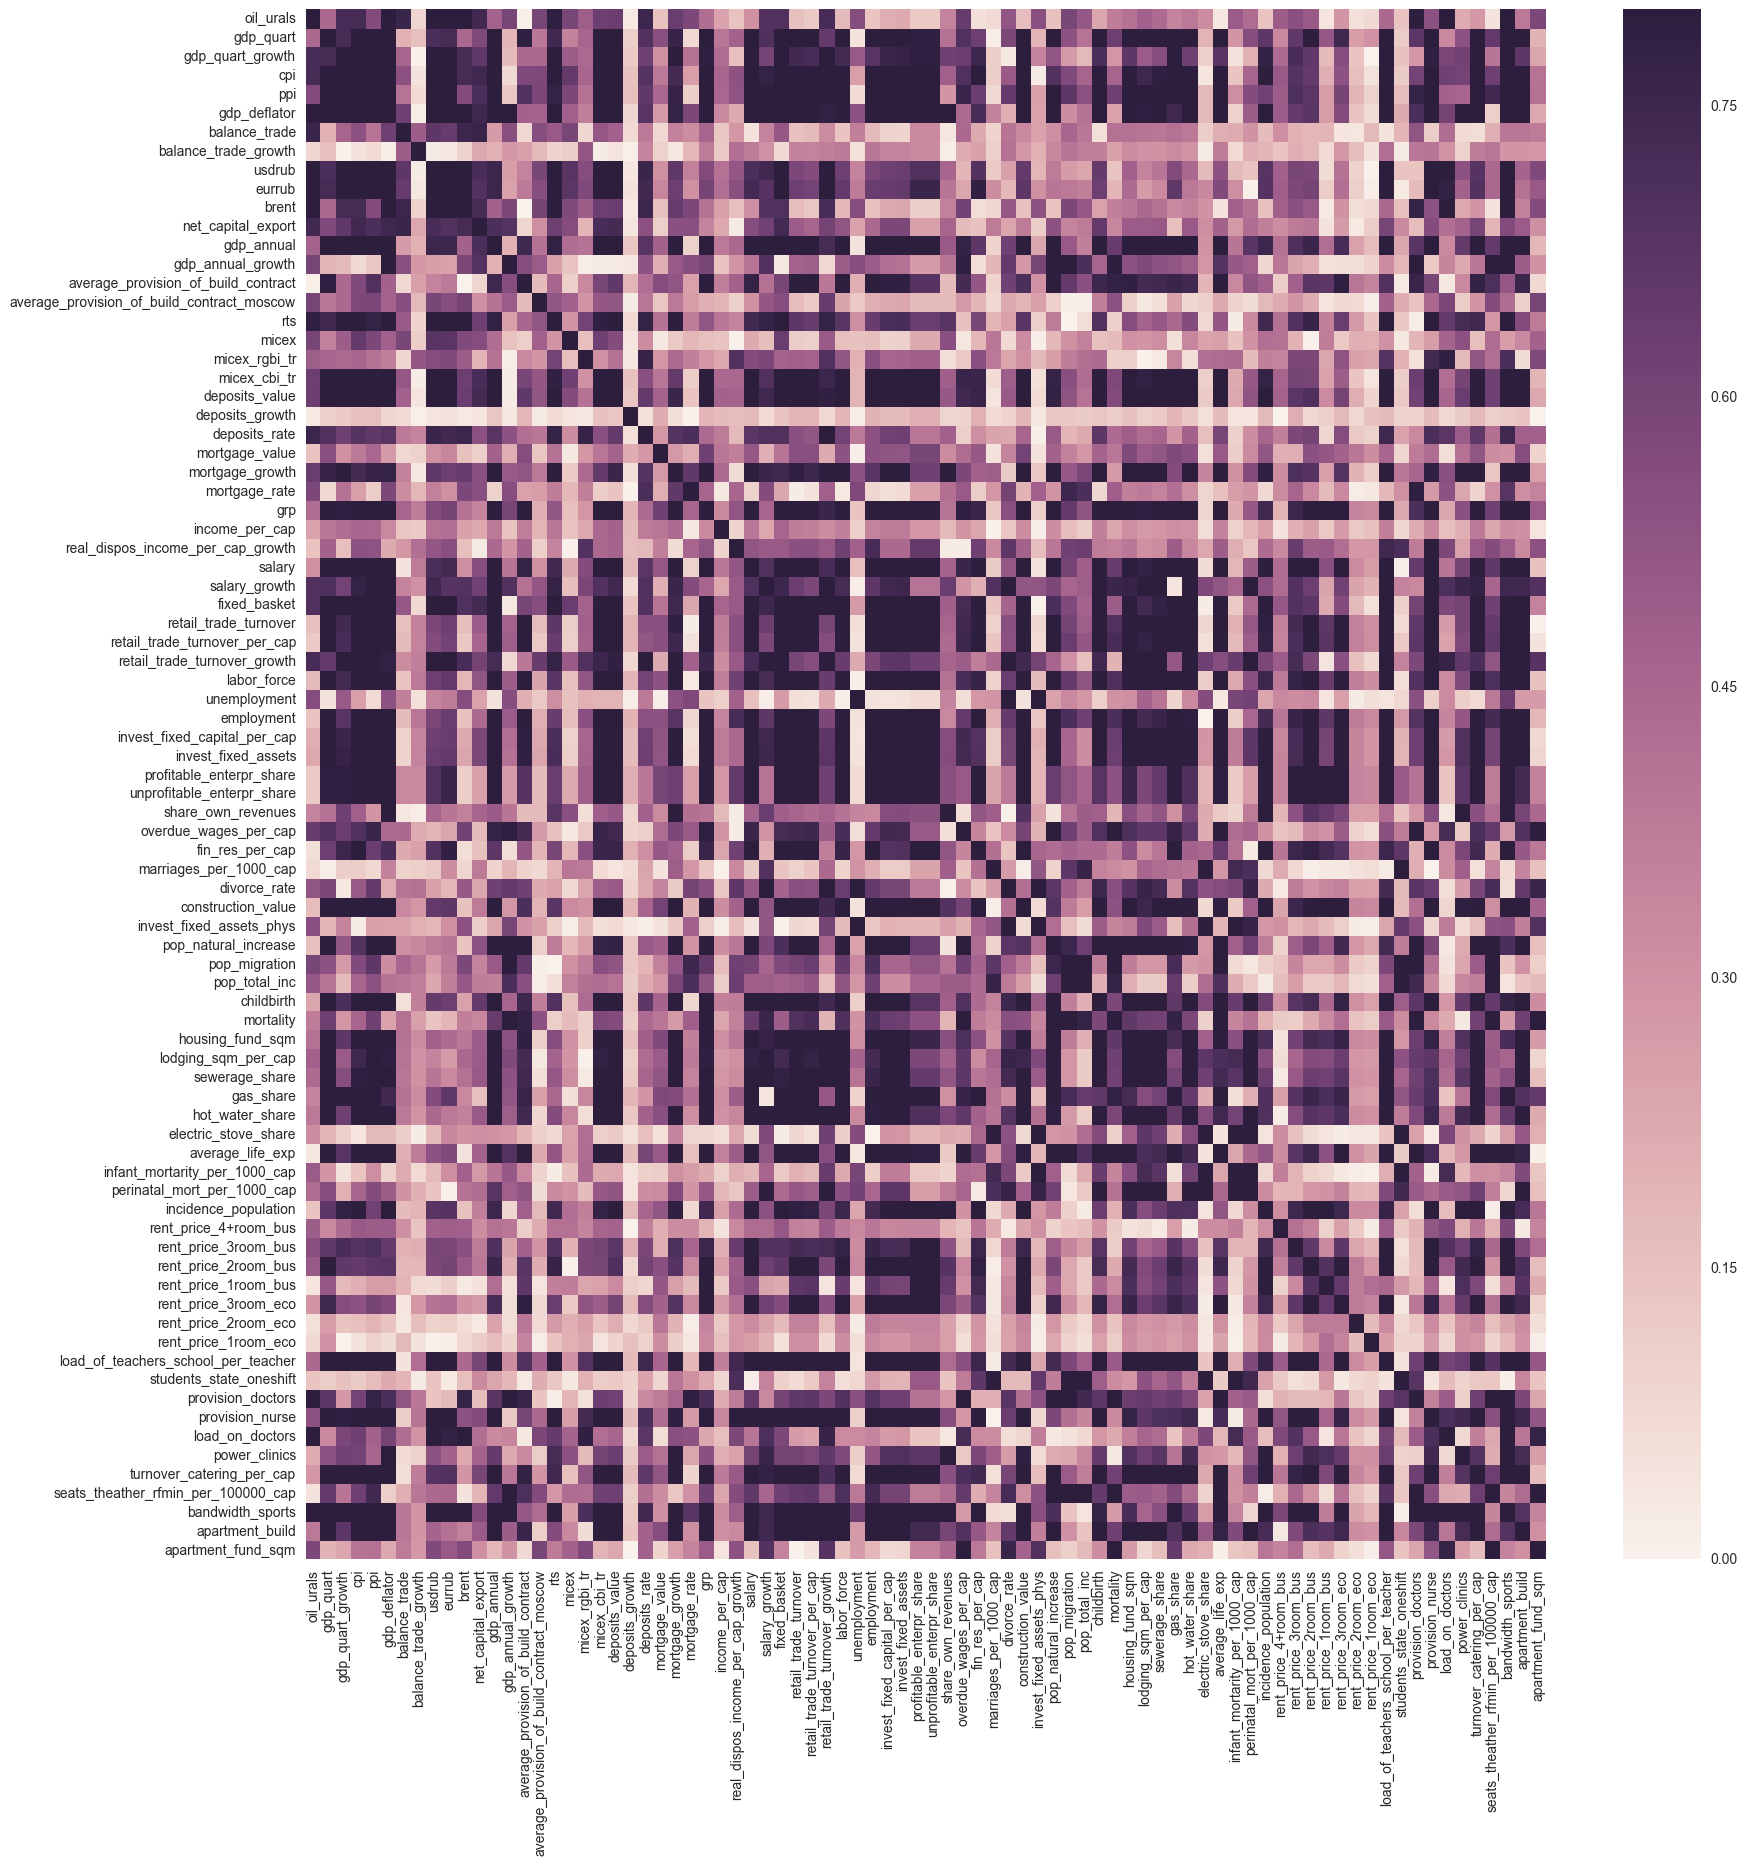

In [7]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(np.abs(macro_data.corr()), vmin=0, vmax = 0.8)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10.0):
    variables = list(range(X.shape[1]))
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X.iloc[:,variables].values, ix) for ix in range(X.iloc[:,variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:,variables]

In [11]:
X = macro_data.drop('timestamp', axis = 1)

In [12]:
calculate_vif_(macro_data.drop('timestamp', axis = 1))

ValueError: On entry to DLASCL parameter number 5 had an illegal value

In [9]:
f = open('./data/data_dictionary.txt')
for line in f:
    print(line)

# train.csv and test.csv



price_doc: sale price (this is the target variable)

id: transaction id

timestamp: date of transaction

full_sq: total area in square meters, including loggias, balconies and other non-residential areas

life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas

floor: for apartments, floor of the building

max_floor: number of floors in the building

material: wall material

build_year: year built

num_room: number of living rooms

kitch_sq: kitchen area

state: apartment condition

product_type: owner-occupier purchase or investment

sub_area: name of the district



The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.



full_all: subarea population

male_f, female_f: subarea population b

- побить фичу "green_zone_part" на бины (?)


In [19]:
train['radiation_raion'].value_counts()

no     19600
yes    10871
Name: radiation_raion, dtype: int64